In [1]:
import pandas as pd
df = pd.read_csv("survey_results_public.csv", index_col="Respondent")
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [2]:
country_grp = df.groupby('Country')

In [3]:
df_schema = pd.read_csv("survey_results_schema.csv", index_col="Column")
df_schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,What is your current total compensation (salar...
ConvertedComp,Salary converted to annual USD salaries using ...
Country,Where do you live?


In [4]:
df['YearsCodePro'].replace('Less than 1 year', '0', inplace=True)
df['YearsCodePro'].replace('More than 50 years', '50', inplace=True)

In [5]:
import numpy as np
df['YearsCodePro'].replace(np.nan, str(int(df['YearsCodePro'].median())), inplace=True)

In [6]:
salary_by_exp = df.groupby('YearsCodePro')[['YearsCodePro','ConvertedComp']].median()
salary_by_exp.reset_index(inplace=True)

In [7]:
import matplotlib.pyplot as plt

In [8]:
edu_levels = country_grp.get_group('India')['EdLevel'].value_counts()

In [9]:
country_grp.get_group('India')['OrgSize'].value_counts(normalize=True)*100

20 to 99 employees                                    22.650700
100 to 499 employees                                  17.881064
10,000 or more employees                              16.500913
10 to 19 employees                                    11.447128
2 to 9 employees                                       9.113051
1,000 to 4,999 employees                               8.301197
500 to 999 employees                                   6.576010
5,000 to 9,999 employees                               4.282525
Just me - I am a freelancer, sole proprietor, etc.     3.247412
Name: OrgSize, dtype: float64

In [10]:
india = country_grp.get_group('India')
india['WorkWeekHrs'].mean()

40.34524695954331

In [11]:
df['Age'].unique()

array([  nan,  25. ,  31. ,  36. ,  30. ,  22. ,  23. ,  49. ,  53. ,
        27. ,  45. ,  32. ,  24. ,  40. ,  18. ,  39. ,  29. ,  16. ,
        34. ,  19. ,  35. ,  20. ,  38. ,  57. ,  28. ,  17. ,  44. ,
        21. ,  48. ,  26. ,  42. ,  55. ,  37. ,  50. ,  41. ,  64. ,
        63. ,  33. ,  43. ,  51. ,  60. ,  59. ,  62. ,  69. ,  52. ,
        46. ,  49.5,  56. ,  47. ,  15. ,  72. ,  13. ,  71. ,  54. ,
        70. ,  11. ,  14. ,  61. ,  26.8,  86. ,  58. ,  67. ,  94. ,
        65. ,  66. ,  84. ,  73. ,  78. ,  68. ,  99. ,  74. ,  12. ,
        77. ,  15.5,  85. ,  76. ,  35.7,  32.5,  81. ,  23.8,  97. ,
        96. ,  26.5,   3. ,  24.5,  14.7,  34.5,   5. ,   1. ,  20.5,
        79. , 279. ,  22.5,  27.5,  32.8,  10. ,  89. ,  80. ,  98. ,
        19.8,   7. ,  21.5,  31.5,  88. ,  39.5,  16.5,  75. ,  83. ,
        23.4,  95. ,  14.5])

In [12]:
df['Age'].dropna().mean()

30.83411081283281

In [13]:
df['Age'].replace(np.nan, 31, inplace=True)

In [14]:
df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [15]:
df['Age1stCode'].replace(['Younger than 5 years', 'Older than 85'], ['5', '85'], inplace=True)

In [16]:
df['Age1stCode'].replace(np.nan, df['Age1stCode'].median(), inplace=True)

In [17]:
df['Experience'] = df['Age'].astype(int) - df['Age1stCode'].astype(int)

In [18]:
df['Experience']

Respondent
1        18
2        12
3        16
4         7
5        15
         ..
64858    15
64867    16
64898    16
64925    16
65112    16
Name: Experience, Length: 64461, dtype: int64

In [19]:
df['YearsCode'].replace(['Less than 1 year', 'More than 50 years', np.nan], [0, 51, df['YearsCode'].mode(dropna=True)], inplace=True)
df['real'] = (df['YearsCode'].astype(int) - df['Experience'].astype(int) <= 5)

([<matplotlib.patches.Wedge at 0x7f7f4e2d2cd0>,
 [Text(-1.0941999969571718, 0.11281119917333271, "Didn't lie"),
  Text(1.193672713871225, -0.123066860524288, 'lied')],
 [Text(-0.5968363619766391, 0.06153338136727238, '96.7%'),
  Text(0.6963090830915479, -0.07178900197250132, '3.3%')])

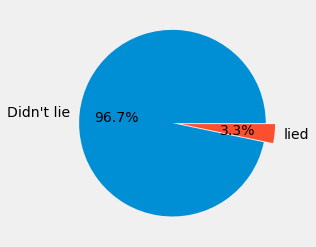

In [29]:
labels = ["Didn't lie", "lied"]
plt.style.use('fivethirtyeight')
plt.pie(df['real'].value_counts(), autopct="%.1f%%", labels=labels, explode=(0, 0.1))